# Data Overview

In [1]:
# Data science standard library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn tools
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Machine Learning Estimator (model)
from sklearn.linear_model import Ridge

# Evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
dataframe = pd.read_csv('car-sales-extended.csv')

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [4]:
dataframe.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


# Encoding Data

In [5]:
data = dataframe.drop('Price',axis=1)
price = dataframe['Price']

In [6]:
categorical_features = ['Make','Colour','Doors']
encoder = OneHotEncoder()
transformer = ColumnTransformer([('encoder',encoder,categorical_features)],remainder='passthrough')
transformed_data = transformer.fit_transform(data)

In [7]:
transformed_data

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [8]:
encoded_data = pd.get_dummies(data)

In [9]:
encoded_data.head()

,Odometer (KM),Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,35431,4,0,1,0,0,0,0,0,0,1
1,192714,5,1,0,0,0,0,1,0,0,0
2,84714,4,0,1,0,0,0,0,0,0,1
3,154365,4,0,0,0,1,0,0,0,0,1
4,181577,3,0,0,1,0,0,1,0,0,0


# Normalize Data

In [10]:
scaler = MinMaxScaler()

In [11]:
scaled_data = pd.DataFrame(scaler.fit_transform(encoded_data))

# Split Data

In [12]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data,price,test_size=0.2)

# Machine Learning Model

In [13]:
model = Ridge()

In [14]:
model.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
prediction = model.predict(x_test)

In [16]:
def visualizeModel(y_true,y_pred):
    plt.figure(figsize=(20,5))
    plt.plot(range(len(y_pred)),prediction,label='Prediction')
    plt.plot(range(len(y_test)),y_test,label='Actual')
    plt.legend()
    plt.show()

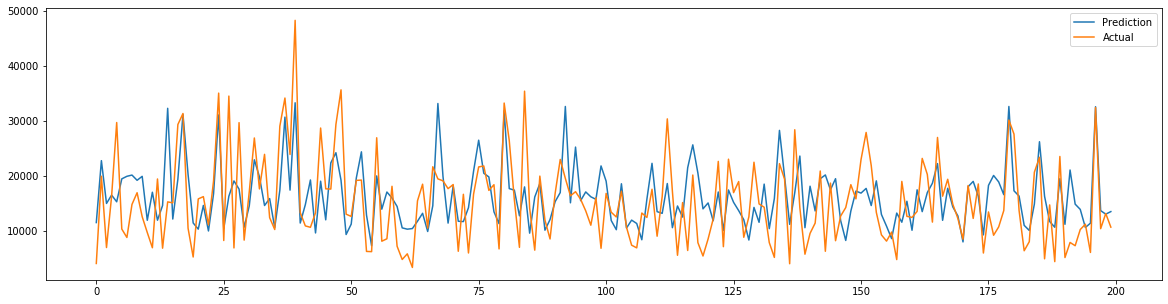

In [17]:
visualizeModel(y_test,prediction)

# Evaluating Model
Evauation Metrics for Regresion are :
* Mean Absolute Error (MAE)
* Root Mean Squared Error (RMSE)
* Mean Absolute Percentage Error (MAPE)
* R-Squared Score

In [18]:
def evaluateModel(y_true,y_pred):
    mae = mean_absolute_error(y_true,y_pred)
    rmse = mean_squared_error(y_true,y_pred)
    r = r2_score(y_true,y_pred)
    
    score = {'Mean Absolute Error (MAE)' : mae,'Root Mean Squared Error (RMSE)':rmse,'R-Squared Score (r2)':r}
    
    return score

In [19]:
evaluateModel(y_test,prediction)

{'Mean Absolute Error (MAE)': 5360.142822657703,
 'Root Mean Squared Error (RMSE)': 44359067.4342441,
 'R-Squared Score (r2)': 0.2869293930508555}

# Evaluate Model

In [20]:
def tuningModels():
    lowest_error = {}
    best_param = {'alpha':0,'fit_intercept':True,'tol':0}
    
    first_launch = True
    for alpha in np.linspace(0,1,10):
        for fit_ict in [True,False]:
            for tol_linspace in np.linspace(0,1,5):
                model = Ridge(
                    alpha=float(alpha),
                    fit_intercept=fit_ict,
                    tol=tol_linspace
                )
                
                model.fit(x_train,y_train)
                prediction = model.predict(x_test)
                error = evaluateModel(y_test,prediction)
                if first_launch:
                    lowest_error = error
                    first_launch = False
                else:
                    if error['Mean Absolute Error (MAE)'] < lowest_error['Mean Absolute Error (MAE)']:
                        lowest_error = error
                        best_param['alpha'] = alpha
                        best_param['fit_intercept'] = fit_ict
                        best_param['tol'] = tol_linspace
    return {'Best Parameters':best_param,'Error Metrics':lowest_error}

In [21]:
tuned_model = tuningModels()

In [22]:
tuned_model

{'Best Parameters': {'alpha': 1.0, 'fit_intercept': False, 'tol': 0.0},
 'Error Metrics': {'Mean Absolute Error (MAE)': 5323.037254190112,
  'Root Mean Squared Error (RMSE)': 43778342.40354939,
  'R-Squared Score (r2)': 0.2962645295643064}}

# Improve Model

In [23]:
import pickle

In [24]:
new_model = Ridge(alpha=0.7,fit_intercept=False,tol=0)

In [25]:
new_model.fit(x_train,y_train)

Ridge(alpha=0.7, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0)

In [26]:
new_prediction = new_model.predict(x_test)

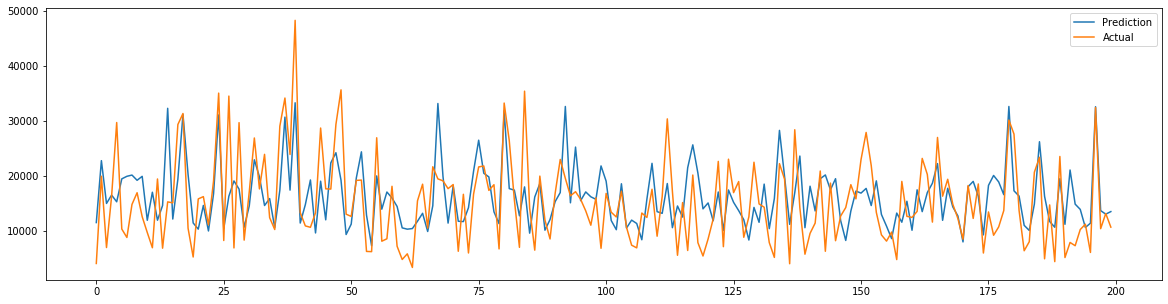

In [27]:
visualizeModel(y_test,new_prediction)

In [28]:
evaluateModel(y_test,new_prediction)

{'Mean Absolute Error (MAE)': 5336.2360986559515,
 'Root Mean Squared Error (RMSE)': 43969485.43188843,
 'R-Squared Score (r2)': 0.29319191142521084}

In [29]:
evaluateModel(y_test,prediction)

{'Mean Absolute Error (MAE)': 5360.142822657703,
 'Root Mean Squared Error (RMSE)': 44359067.4342441,
 'R-Squared Score (r2)': 0.2869293930508555}

# Save Model

In [31]:
with open('CarSalesModel.pkl','wb') as file:
    pickle.dump(new_model,file)